#  Data ingestion from different sources to perform EDA (Exploratory data analysis) 

# Import the necessary libraries for Data ingestion and EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# collection of individual data and later merging it.

# 1. Inflation Dataset


Inflation is the rate at which the general level of prices for goods and services rises, resulting in a decrease in the purchasing power of a currency

In [121]:
# import the csv file for local
inflation_data=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\inflation.csv")
inflation_data.rename(columns={'FPCPITOTLZGUSA':'inflation %'},inplace=True)
inflation_data

,DATE,inflation %
0,2000-01-01,3.376857
1,2001-01-01,2.826171
2,2002-01-01,1.586032
3,2003-01-01,2.270095
4,2004-01-01,2.677237
5,2005-01-01,3.392747
6,2006-01-01,3.225944
7,2007-01-01,2.852672
8,2008-01-01,3.839100
9,2009-01-01,-0.355546


In [122]:
inflation_data.shape

(23, 2)

In [123]:
inflation_data.isnull().sum()

DATE           0
inflation %    0
dtype: int64

In [124]:
inflation_data.sample(5).round(2)

,DATE,inflation %
4,2004-01-01,2.68
16,2016-01-01,1.26
8,2008-01-01,3.84
9,2009-01-01,-0.36
12,2012-01-01,2.07


In [125]:
inflation_data.DATE=pd.to_datetime(inflation_data['DATE'])
inflation_data['Year']=inflation_data['DATE'].dt.year
inflation_data=inflation_data[['Year','inflation %']]
inflation_data=inflation_data.round(2)


In [126]:
inflation_data

,Year,inflation %
0,2000,3.38
1,2001,2.83
2,2002,1.59
3,2003,2.27
4,2004,2.68
5,2005,3.39
6,2006,3.23
7,2007,2.85
8,2008,3.84
9,2009,-0.36


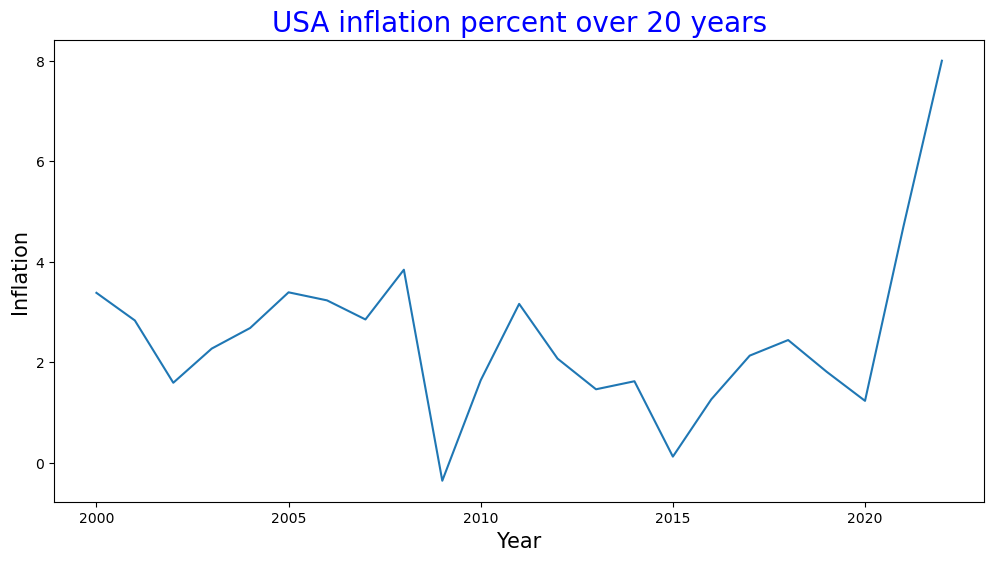

In [136]:
# ploting the graph against year
# slect the figure size
plt.figure(figsize=(12,6))
# X-axis lable
plt.xlabel('Year',fontsize=15)
# y axis label
plt.ylabel("Inflation",fontsize=15)
# title of the fraph
plt.title("USA inflation percent over 20 years",fontsize=20 , color='blue')
# using seaborn library ploting a line plot.
sns.lineplot(x=inflation_data['Year'],y=inflation_data['inflation %'])
plt.show()

**Following the similar steps for other datasets.**

# 2. Population dataset

Population refers to the total number of people living in a specific geographic area or region.

In [138]:
population_data=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\population.csv")
population_data.rename(columns={'POPTHM':'population'},inplace=True)
population_data

,DATE,population
0,2000-01-01,281083.0
1,2000-02-01,281299.0
2,2000-03-01,281531.0
3,2000-04-01,281763.0
4,2000-05-01,281996.0
...,...,...
280,2023-05-01,335013.0
281,2023-06-01,335163.0
282,2023-07-01,335329.0
283,2023-08-01,335501.0


In [139]:
population_data.shape

(285, 2)

In [140]:
population_data.sample(5)

,DATE,population
273,2022-10-01,334141.0
272,2022-09-01,333976.0
118,2009-11-01,308289.0
171,2014-04-01,319020.0
164,2013-09-01,317635.0


In [141]:
population_data.isnull().sum()

DATE          0
population    0
dtype: int64

In [131]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        285 non-null    object 
 1   population  285 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [142]:
population_data.DATE=pd.to_datetime(population_data['DATE'])
population_data['Year'] = population_data['DATE'].dt.year
population_data=population_data[['Year','population']]

In [133]:
Average_population=population_data.groupby('Year')['population'].mean().round(2).reset_index()
Average_population.rename(columns={'population': 'Average Population'})
Average_population

,Year,population
0,2000,282398.42
1,2001,285225.17
2,2002,287954.58
3,2003,290626.25
4,2004,293262.33
5,2005,295992.92
6,2006,298817.67
7,2007,301696.17
8,2008,304543.08
9,2009,307240.08


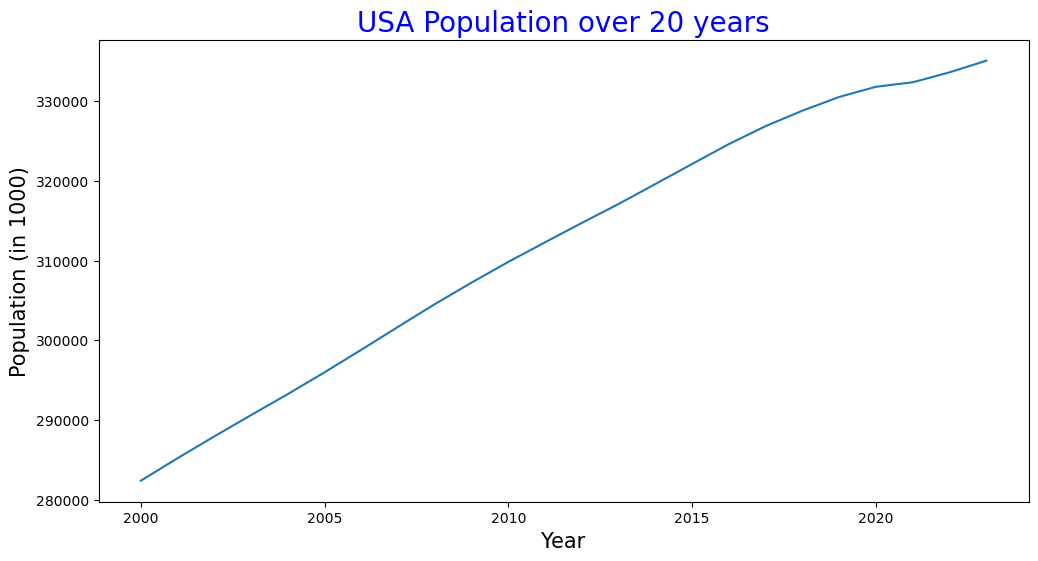

In [143]:
plt.figure(figsize=(12,6))
plt.xlabel('Year',fontsize=15)
plt.ylabel("Population (in 1000)",fontsize=15)
plt.title("USA Population over 20 years",fontsize=20 , color='blue')
sns.lineplot(x=Average_population['Year'],y=Average_population['population'])
plt.show()



# 3. Price Dataset

Changes in house price over the 20 years 

In [144]:
price_data=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\price.csv")
price_data.rename(columns={'ASPUS':'price'},inplace=True)
price_data

,DATE,price
0,2000-01-01,202900.0
1,2000-04-01,202400.0
2,2000-07-01,204100.0
3,2000-10-01,212100.0
4,2001-01-01,211000.0
...,...,...
90,2022-07-01,547800.0
91,2022-10-01,552600.0
92,2023-01-01,505300.0
93,2023-04-01,503000.0


In [145]:
price_data.DATE=pd.to_datetime(price_data['DATE'])
price_data['Year']=price_data['DATE'].dt.year
price_data=price_data[['Year','price']]

In [15]:
average_price=price_data.groupby('Year')['price'].mean().round(2).reset_index()
average_price

,Year,price
0,2000,205375.00
1,2001,211050.00
2,2002,226700.00
3,2003,244550.00
4,2004,272125.00
5,2005,291275.00
6,2006,303900.00
7,2007,309800.00
8,2008,289075.00
9,2009,269350.00


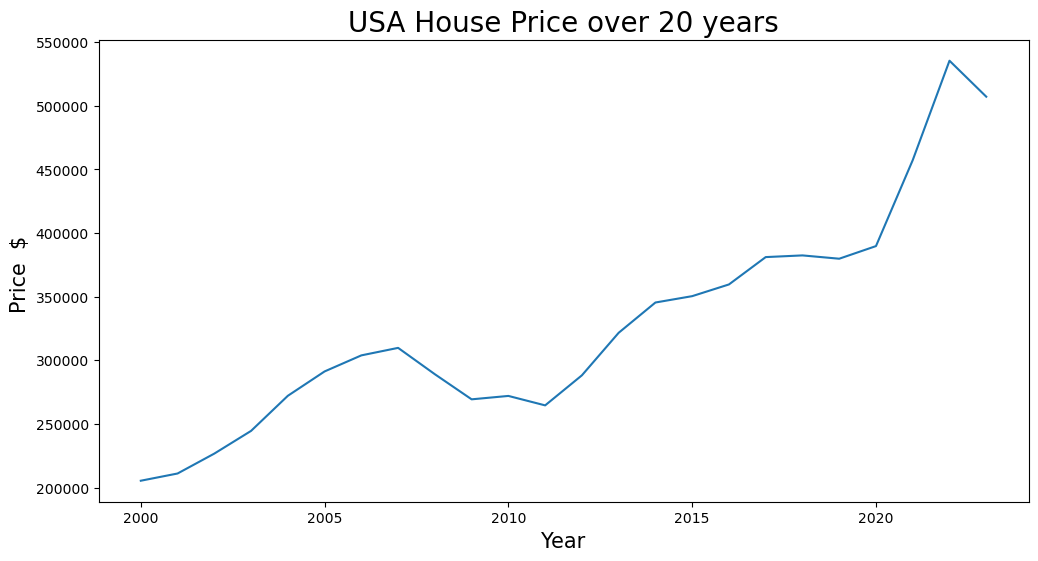

In [146]:
plt.figure(figsize=(12,6))
plt.xlabel('Year',fontsize=15)
plt.ylabel("Price  $ ",fontsize=15)
plt.title("USA House Price over 20 years",fontsize=20 )
sns.lineplot(x=average_price['Year'],y=average_price['price'])
plt.show()

4. # Mortgage 

Mortgage refers to a type of loan that is specifically used to purchase real estate, typically residential properties such as homes or apartments. When someone buys a home and doesn't have enough cash to pay for the entire purchase upfront, they can take out a mortgage to cover the remaining cost of the property with interest.



In [147]:
mortgage_data=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\mortgage.csv")
mortgage_data.rename(columns={'MORTGAGE30US':'Mortgage'},inplace=True)


In [148]:
mortgage_data

,DATE,Mortgage
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25
...,...,...
1239,2023-10-05,7.49
1240,2023-10-12,7.57
1241,2023-10-19,7.63
1242,2023-10-26,7.79


In [149]:
mortgage_data.DATE=pd.to_datetime(mortgage_data['DATE'])
mortgage_data['Year']=mortgage_data['DATE'].dt.year
mortgage_data=mortgage_data[['Year','Mortgage']]

In [150]:
average_mortgage=mortgage_data.groupby('Year')['Mortgage'].mean().round(2).reset_index()
average_mortgage

,Year,Mortgage
0,2000,8.05
1,2001,6.97
2,2002,6.54
3,2003,5.83
4,2004,5.84
5,2005,5.87
6,2006,6.41
7,2007,6.34
8,2008,6.03
9,2009,5.04


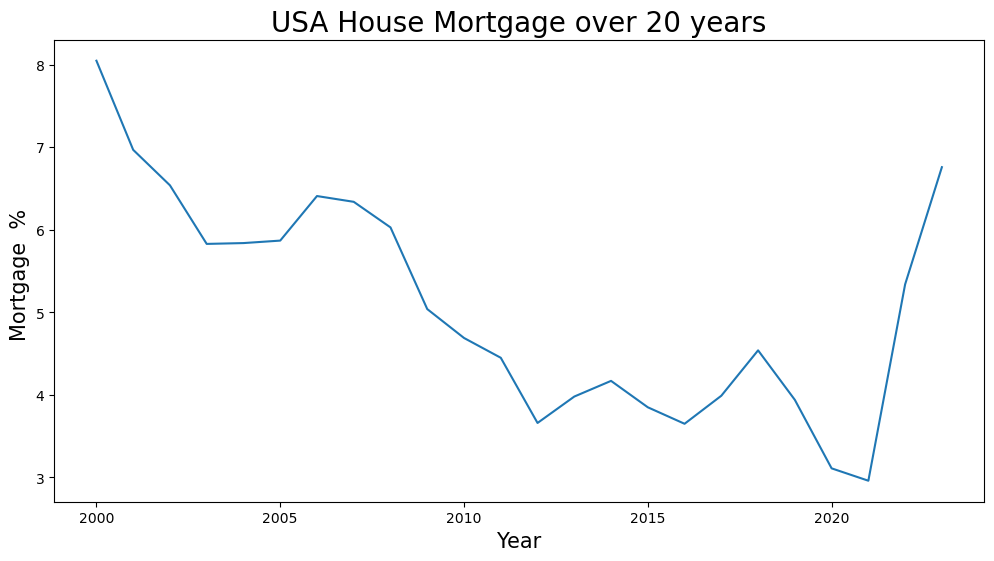

In [151]:
plt.figure(figsize=(12,6))
plt.xlabel('Year',fontsize=15)
plt.ylabel("Mortgage  % ",fontsize=15)
plt.title("USA House Mortgage over 20 years",fontsize=20 )
sns.lineplot(x=average_mortgage['Year'],y=average_mortgage['Mortgage'])
plt.show()

# 5. Region House Prices

The United States is divided into several regions, each with its own distinct characteristics, culture, and geography. These are not official administrative but used for geographical and cultural categorization. The are : 
1. Northeast
2. Midwest
3. South
4. West

In [281]:
region_price=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\Home_price_region.csv")
region_price

,DATE,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price
0,01-01-2000,165300.0,229300.0,148000.0,190300.0
1,01-04-2000,165900.0,239500.0,142500.0,190800.0
2,01-07-2000,162200.0,212800.0,152300.0,192700.0
3,01-10-2000,180000.0,241400.0,148400.0,210300.0
4,01-01-2001,170400.0,242800.0,154700.0,206400.0
...,...,...,...,...,...
143,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN
146,NaN,NaN,NaN,NaN,NaN


In [282]:
region_price.shape

(148, 5)

In [283]:
region_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   89 non-null     object 
 1   Midwest_house_price    89 non-null     float64
 2   Northeast_house_price  89 non-null     float64
 3   South_house_price      89 non-null     float64
 4   West_house_price       89 non-null     float64
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [284]:
region_price.sample(5)


,DATE,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price
1,01-04-2000,165900.0,239500.0,142500.0,190800.0
111,NaN,NaN,NaN,NaN,NaN
39,01-10-2009,196000.0,324600.0,191800.0,251900.0
89,NaN,NaN,NaN,NaN,NaN
62,01-07-2015,276300.0,383700.0,276100.0,330800.0


In [285]:
region_price.isnull().sum()

DATE                     59
Midwest_house_price      59
Northeast_house_price    59
South_house_price        59
West_house_price         59
dtype: int64

In [286]:
region_price.duplicated().sum()

58

In [287]:
region_price.dropna(inplace=True)
region_price


,DATE,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price
0,01-01-2000,165300.0,229300.0,148000.0,190300.0
1,01-04-2000,165900.0,239500.0,142500.0,190800.0
2,01-07-2000,162200.0,212800.0,152300.0,192700.0
3,01-10-2000,180000.0,241400.0,148400.0,210300.0
4,01-01-2001,170400.0,242800.0,154700.0,206400.0
...,...,...,...,...,...
84,01-01-2021,320600.0,511700.0,327300.0,473500.0
85,01-04-2021,324100.0,543800.0,342200.0,490200.0
86,01-07-2021,358800.0,523800.0,372500.0,516000.0
87,01-10-2021,372700.0,615900.0,378000.0,548300.0


In [288]:
region_price.DATE=pd.to_datetime(region_price['DATE'])
region_price['Year']=region_price['DATE'].dt.year
region_price=region_price[['Year','Midwest_house_price','Northeast_house_price','South_house_price','West_house_price']]

In [289]:
region_price

,Year,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price
0,2000,165300.0,229300.0,148000.0,190300.0
1,2000,165900.0,239500.0,142500.0,190800.0
2,2000,162200.0,212800.0,152300.0,192700.0
3,2000,180000.0,241400.0,148400.0,210300.0
4,2001,170400.0,242800.0,154700.0,206400.0
...,...,...,...,...,...
84,2021,320600.0,511700.0,327300.0,473500.0
85,2021,324100.0,543800.0,342200.0,490200.0
86,2021,358800.0,523800.0,372500.0,516000.0
87,2021,372700.0,615900.0,378000.0,548300.0


In [290]:
average_region_price=region_price.groupby('Year')['Midwest_house_price','Northeast_house_price','South_house_price','West_house_price'].mean().round(2).reset_index()
average_region_price

C:\Users\abhig\AppData\Local\Temp\ipykernel_32120\859912142.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_region_price=region_price.groupby('Year')['Midwest_house_price','Northeast_house_price','South_house_price','West_house_price'].mean().round(2).reset_index()


,Year,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price
0,2000,168350.0,230750.0,147800.0,196025.0
1,2001,171425.0,247500.0,153925.0,214075.0
2,2002,176375.0,264450.0,162125.0,237650.0
3,2003,182075.0,259350.0,165800.0,261075.0
4,2004,206200.0,321850.0,178200.0,281525.0
5,2005,213700.0,345375.0,192650.0,329000.0
6,2006,211700.0,352775.0,203775.0,339625.0
7,2007,205750.0,328350.0,215250.0,329400.0
8,2008,201225.0,341075.0,200575.0,295925.0
9,2009,190300.0,308525.0,192950.0,263075.0


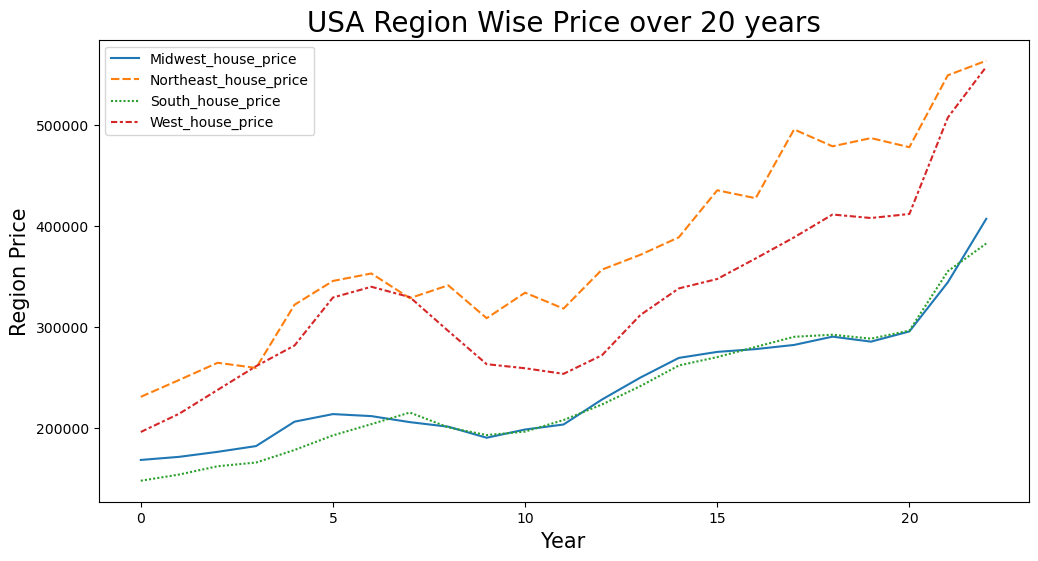

In [291]:
average_region_price1=average_region_price.drop(labels='Year',axis=1)

plt.figure(figsize=(12, 6))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Region Price', fontsize=15)
plt.title('USA Region Wise Price over 20 years', fontsize=20)
sns.lineplot(data=average_region_price1)
average_region_price.set_index('Year',inplace=True)
plt.show()


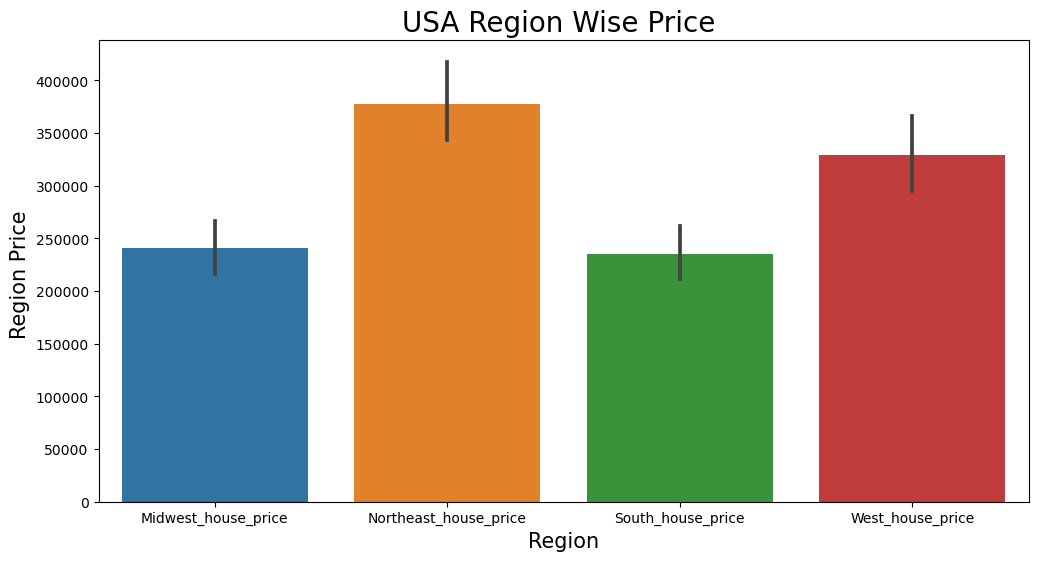

In [252]:
plt.figure(figsize=(12,6))
plt.xlabel('Region',fontsize=15)
plt.ylabel("Region Price ",fontsize=15)
plt.title("USA Region Wise Price ",fontsize=20 )

sns.barplot(data=average_region_price)
plt.show()

# 6. Unemployement rate

The unemployment rate is defined as the percentage of the labor force that is currently unemployed and actively seeking employment.

Unemployment Rate = (Number of Unemployed / Labor Force) x 100

In [292]:
unemployement_rate=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\unemp_rate.csv")
unemployement_rate.rename(columns={'U2RATE':'Unemp_rate'},inplace=True)
unemployement_rate

,DATE,Unemp_rate
0,2000-01-01,1.8
1,2000-02-01,1.9
2,2000-03-01,1.8
3,2000-04-01,1.6
4,2000-05-01,1.7
...,...,...
281,2023-06-01,1.7
282,2023-07-01,1.6
283,2023-08-01,1.7
284,2023-09-01,1.7


In [293]:
unemployement_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        286 non-null    object 
 1   Unemp_rate  286 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


In [294]:
unemployement_rate.sample(5)

,DATE,Unemp_rate
113,2009-06-01,6.2
110,2009-03-01,5.5
217,2018-02-01,2.0
130,2010-11-01,6.2
23,2001-12-01,3.1


In [295]:
unemployement_rate.isnull().sum()

DATE          0
Unemp_rate    0
dtype: int64

In [167]:
unemployement_rate.duplicated().sum()

0

In [168]:
unemployement_rate.DATE=pd.to_datetime(unemployement_rate['DATE'])
unemployement_rate['Year']=unemployement_rate['DATE'].dt.year
unemployement_rate=unemployement_rate[['Year','Unemp_rate']]
unemployement_rate

,Year,Unemp_rate
0,2000,1.8
1,2000,1.9
2,2000,1.8
3,2000,1.6
4,2000,1.7
...,...,...
281,2023,1.7
282,2023,1.6
283,2023,1.7
284,2023,1.7


In [169]:
averge_unemp_rate=unemployement_rate.groupby('Year')['Unemp_rate'].mean().round(2).reset_index()

In [170]:
averge_unemp_rate

,Year,Unemp_rate
0,2000,1.77
1,2001,2.42
2,2002,3.18
3,2003,3.32
4,2004,2.85
5,2005,2.43
6,2006,2.19
7,2007,2.29
8,2008,3.12
9,2009,5.96


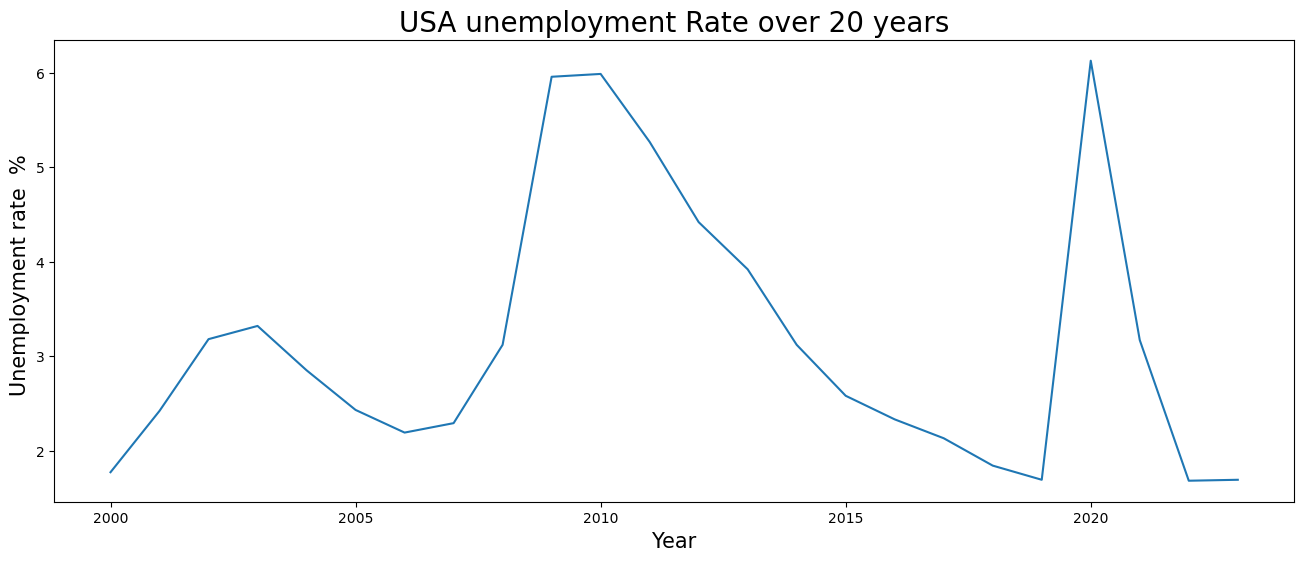

In [171]:
plt.figure(figsize=(16,6))
plt.xlabel('Year',fontsize=15)
plt.ylabel("Unemployment rate  % ",fontsize=15)
plt.title("USA unemployment Rate over 20 years",fontsize=20 )
sns.lineplot(x=averge_unemp_rate['Year'],y=averge_unemp_rate['Unemp_rate'])
plt.show()

# 7. GDP 

Gross Domestic Product (GDP) is a key economic indicator that measures the total value of all goods and services produced within a country's borders during a specific time period. GDP is often used to assess the overall economic performance and size of a country's economy.

In [172]:
gdp=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\GDP.csv")
gdp

,DATE,GDP
0,01-01-2000,10002.179
1,01-04-2000,10247.720
2,01-07-2000,10318.165
3,01-10-2000,10435.744
4,01-01-2001,10470.231
...,...,...
90,01-07-2022,25994.639
91,01-10-2022,26408.405
92,01-01-2023,26813.601
93,01-04-2023,27063.012


In [173]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    95 non-null     object 
 1   GDP     95 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [175]:
gdp.sample(5)

,DATE,GDP
28,01-01-2007,14215.651
57,01-04-2014,17518.508
3,01-10-2000,10435.744
79,01-10-2019,21902.390
1,01-04-2000,10247.720


In [176]:
gdp.duplicated().sum()

0

In [177]:
gdp.isna().sum()

DATE    0
GDP     0
dtype: int64

In [178]:
gdp.DATE=pd.to_datetime(gdp['DATE'])
gdp['Year']=gdp['DATE'].dt.year
gdp=gdp[['Year','GDP']]

In [179]:
average_gdp=gdp.groupby('Year')['GDP'].mean().round(2).reset_index()
average_gdp

,Year,GDP
0,2000,10250.95
1,2001,10581.93
2,2002,10929.11
3,2003,11456.45
4,2004,12217.20
5,2005,13039.20
6,2006,13815.58
7,2007,14474.23
8,2008,14769.86
9,2009,14478.07


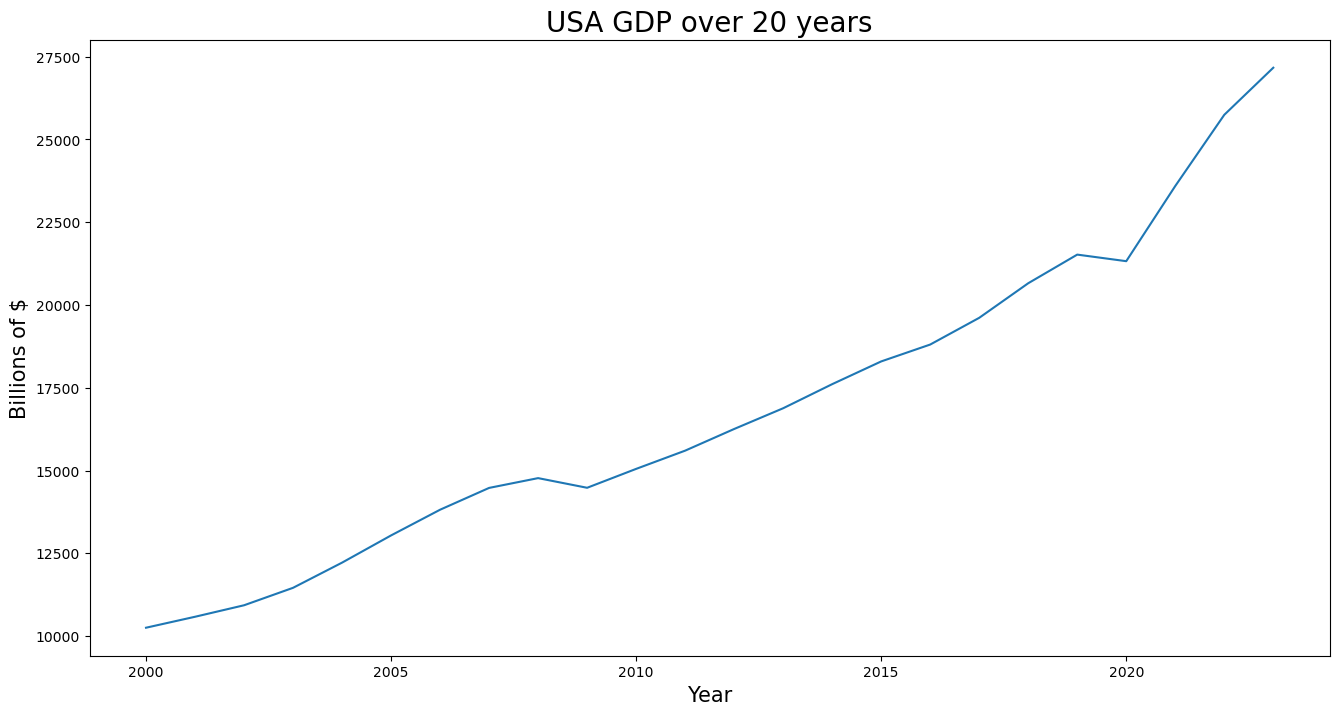

In [180]:
plt.figure(figsize=(16,8))
plt.xlabel('Year',fontsize=15)
plt.ylabel("Billions of $   ",fontsize=15)
plt.title("USA GDP over 20 years",fontsize=20 )
sns.lineplot(x=average_gdp['Year'],y=average_gdp['GDP'])
plt.show()

# 8. Household income 


Household income refers to the total income earned by all members of a single household. It includes income from various sources.

In [181]:
house_income=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\house_income.csv")
house_income.rename(columns={'MEHOINUSA672N':'Income'},inplace=True)
house_income

,DATE,Income
0,2000-01-01,67470
1,2001-01-01,66360
2,2002-01-01,65820
3,2003-01-01,65860
4,2004-01-01,65760
5,2005-01-01,66780
6,2006-01-01,67520
7,2007-01-01,68610
8,2008-01-01,66280
9,2009-01-01,65850


In [182]:
house_income.DATE=pd.to_datetime(house_income['DATE'])
house_income['Year']=house_income['DATE'].dt.year
house_income=house_income[['Year','Income']]
house_income

,Year,Income
0,2000,67470
1,2001,66360
2,2002,65820
3,2003,65860
4,2004,65760
5,2005,66780
6,2006,67520
7,2007,68610
8,2008,66280
9,2009,65850


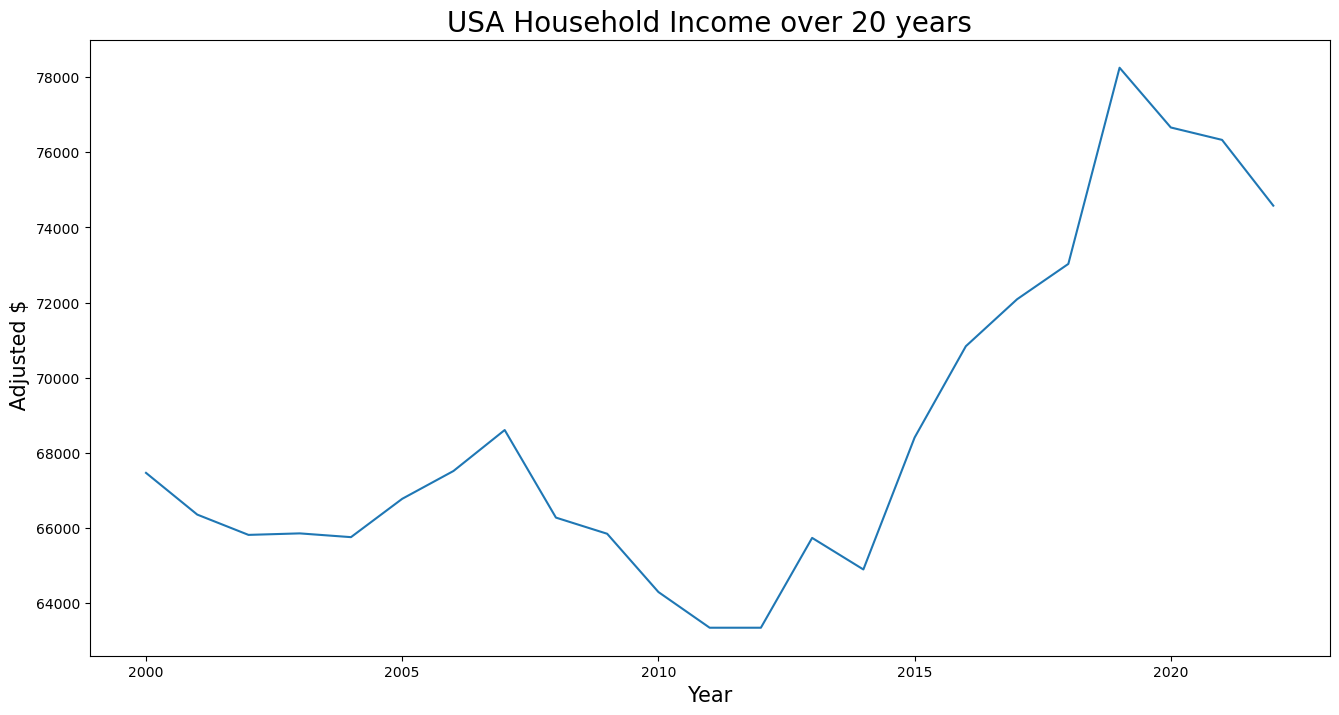

In [183]:
plt.figure(figsize=(16,8))
plt.xlabel('Year',fontsize=15)
plt.ylabel(" Adjusted $   ",fontsize=15)
plt.title("USA Household Income over 20 years",fontsize=20 )
sns.lineplot(x=house_income['Year'],y=house_income['Income'])
plt.show()

# 9. Housing price Index


The Housing Price Index (HPI) is a statistical measure designed to track changes in the price of residential properties over time. It is an important economic indicator that helps assess trends in the real estate market.

HPI = (Current Period's Average Property Price / Base Period's Average Property Price) * 100

In [184]:
HPI=pd.read_csv(r"C:\Users\abhig\OneDrive\Desktop\HOME LCC\DATA\HPI_1.csv")
HPI.rename(columns={'CSUSHPISA':'H_PriceIndex'},inplace=True)
HPI


,DATE,H_PriceIndex
0,2000-01-01,100.551
1,2000-02-01,101.339
2,2000-03-01,102.127
3,2000-04-01,102.922
4,2000-05-01,103.678
...,...,...
279,2023-04-01,300.198
280,2023-05-01,302.620
281,2023-06-01,304.651
282,2023-07-01,306.634


In [185]:
HPI.duplicated().sum()

0

In [186]:
HPI.DATE=pd.to_datetime(HPI['DATE'])
HPI['Year']=HPI['DATE'].dt.year
HPI=HPI[['Year','H_PriceIndex']]
HPI


,Year,H_PriceIndex
0,2000,100.551
1,2000,101.339
2,2000,102.127
3,2000,102.922
4,2000,103.678
...,...,...
279,2023,300.198
280,2023,302.620
281,2023,304.651
282,2023,306.634


In [187]:
Average_HPI=HPI.groupby('Year')['H_PriceIndex'].mean().round(2).reset_index()
Average_HPI

,Year,H_PriceIndex
0,2000,104.77
1,2001,113.18
2,2002,122.28
3,2003,133.73
4,2004,150.44
5,2005,171.74
6,2006,183.45
7,2007,179.92
8,2008,164.06
9,2009,148.55


# merging all the data into one dataframe


Average_population

average_gdp

average_mortgage

averge_unemp_rate

house_income

average_region_price

average_price

inflation 

In [188]:
merge_data=pd.merge(Average_population,average_gdp,on='Year',how='inner')
merge_data=pd.merge(merge_data,average_mortgage,on='Year',how='inner')

In [189]:
merge_data=pd.merge(merge_data,averge_unemp_rate,on='Year',how='inner')

In [190]:
merge_data=pd.merge(merge_data,house_income,on='Year',how='inner')

In [191]:
merge_data=pd.merge(merge_data,average_region_price,on='Year',how='inner')

In [194]:
merge_data=pd.merge(merge_data,average_price,on='Year',how='inner')

In [192]:
merge_data=pd.merge(merge_data,Average_HPI,on='Year',how='inner')

In [193]:
merge_data=pd.merge(merge_data,inflation_data,on='Year',how='inner')

Merged data with respective years and factors 

In [298]:
merge_data

,Year,Population,Gdp,Mortgage,Unemp_rate,Income,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price,H_priceindex,Inflation %,Price
0,2000,282398.42,10250.95,8.05,1.77,67470,168350.0,230750.0,147800.0,196025.0,104.77,3.38,205375.0
1,2001,285225.17,10581.93,6.97,2.42,66360,171425.0,247500.0,153925.0,214075.0,113.18,2.83,211050.0
2,2002,287954.58,10929.11,6.54,3.18,65820,176375.0,264450.0,162125.0,237650.0,122.28,1.59,226700.0
3,2003,290626.25,11456.45,5.83,3.32,65860,182075.0,259350.0,165800.0,261075.0,133.73,2.27,244550.0
4,2004,293262.33,12217.20,5.84,2.85,65760,206200.0,321850.0,178200.0,281525.0,150.44,2.68,272125.0
5,2005,295992.92,13039.20,5.87,2.43,66780,213700.0,345375.0,192650.0,329000.0,171.74,3.39,291275.0
6,2006,298817.67,13815.58,6.41,2.19,67520,211700.0,352775.0,203775.0,339625.0,183.45,3.23,303900.0
7,2007,301696.17,14474.23,6.34,2.29,68610,205750.0,328350.0,215250.0,329400.0,179.92,2.85,309800.0
8,2008,304543.08,14769.86,6.03,3.12,66280,201225.0,341075.0,200575.0,295925.0,164.06,3.84,289075.0
9,2009,307240.08,14478.07,5.04,5.96,65850,190300.0,308525.0,192950.0,263075.0,148.55,-0.36,269350.0


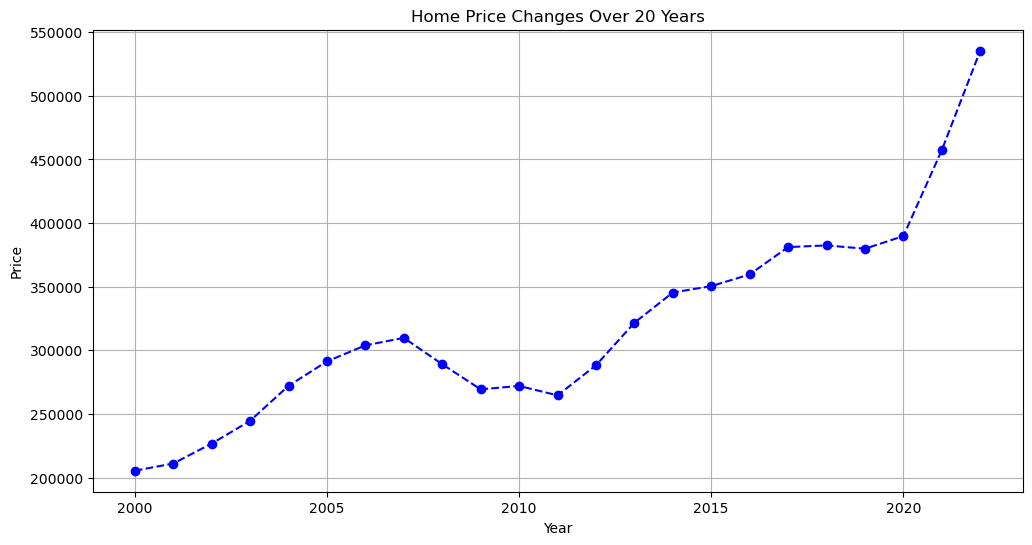

In [304]:


# Extract the 'Year' and 'Price' columns from your dataset
years = data['Year']
prices = data['Price']

# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(years, prices, marker='o', linestyle='--', color='b')
plt.title('Home Price Changes Over 20 Years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)

# Show the plot
plt.show()

# Graph ploting and changes of prices with all the independent features

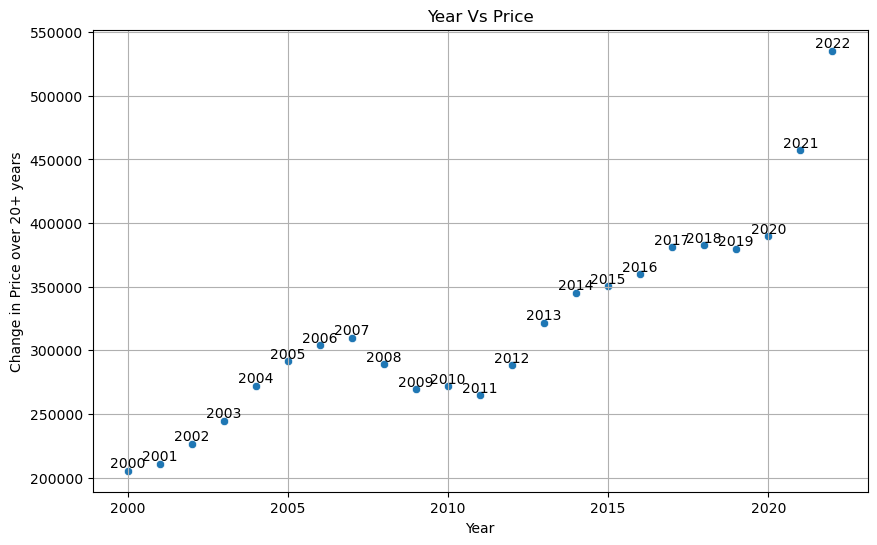

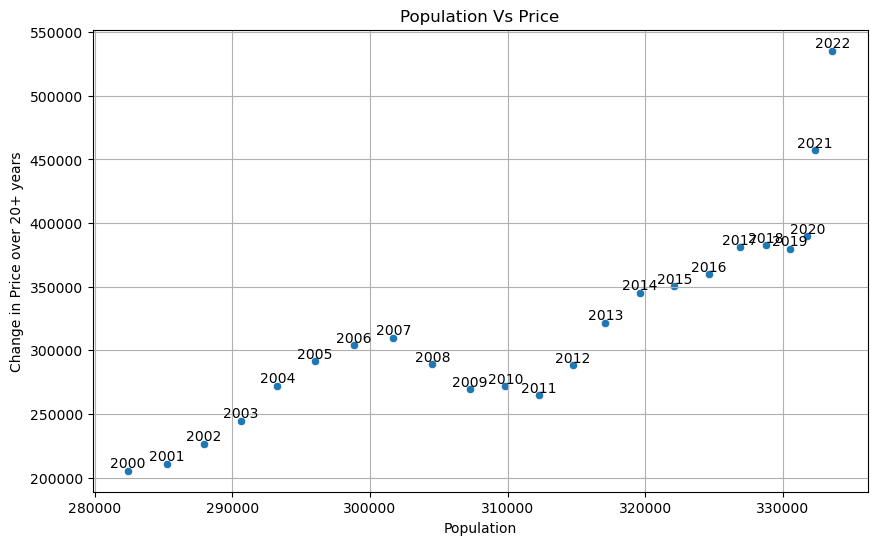

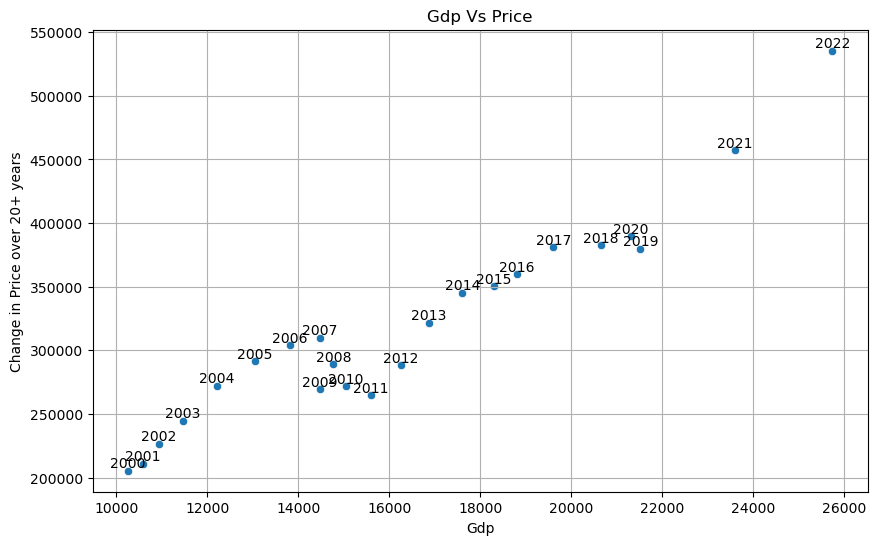

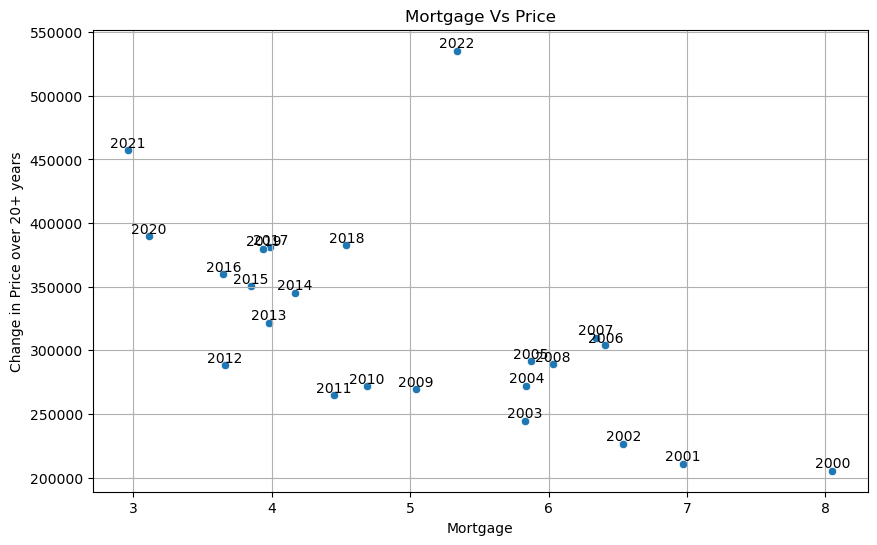

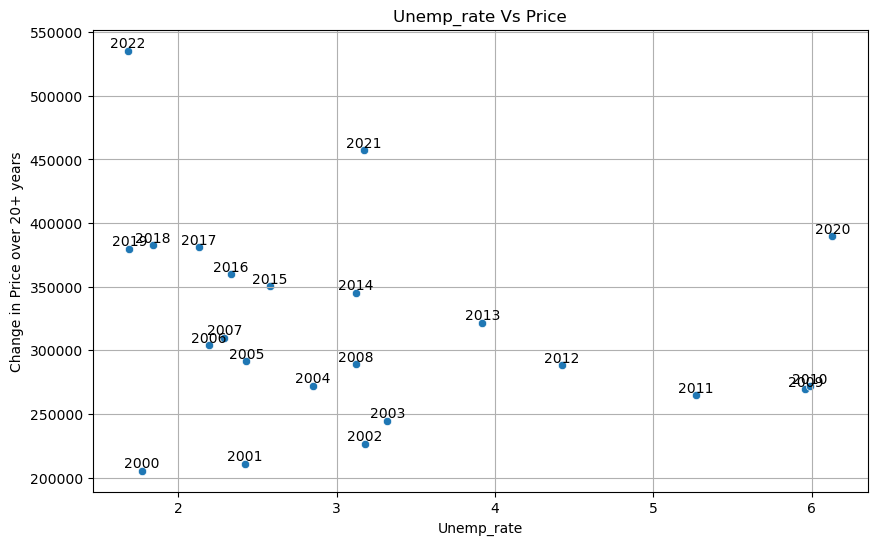

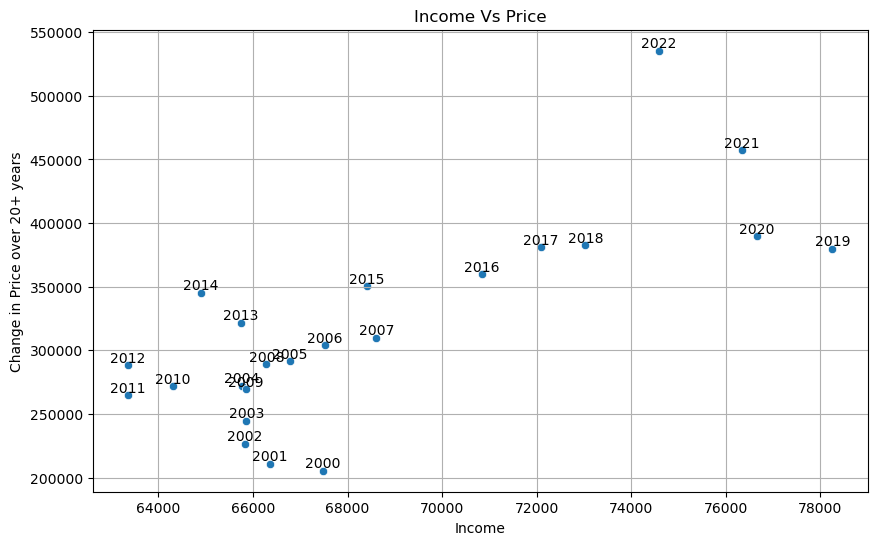

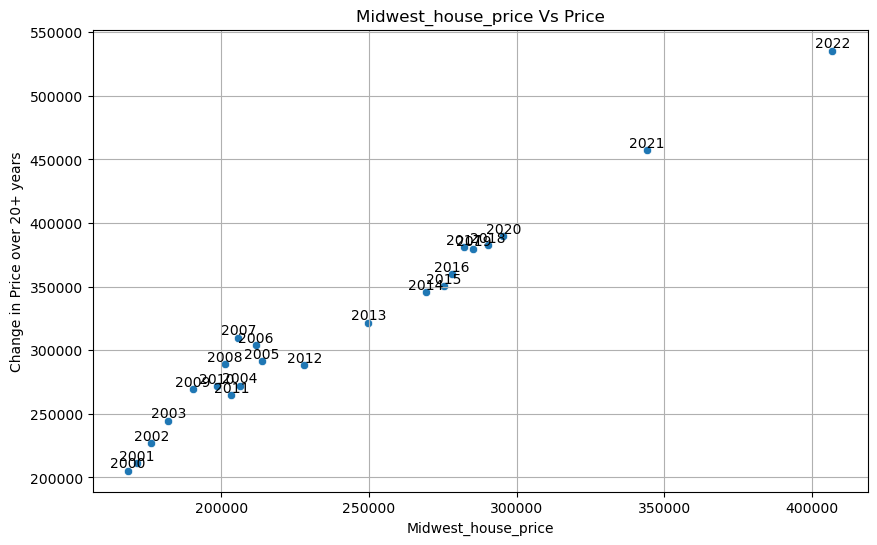

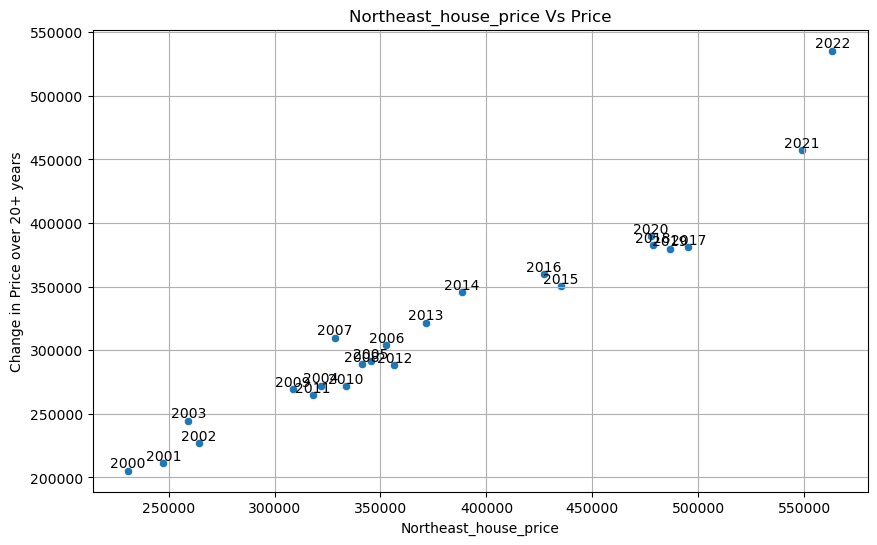

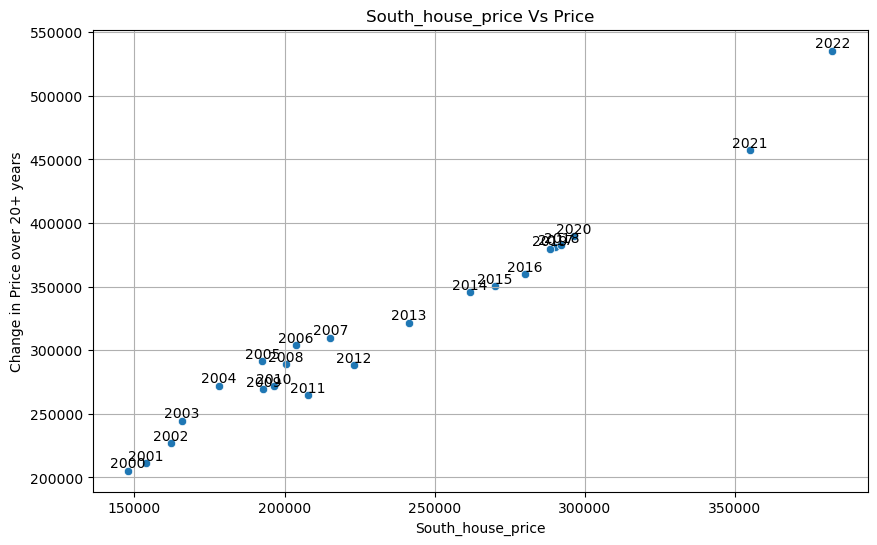

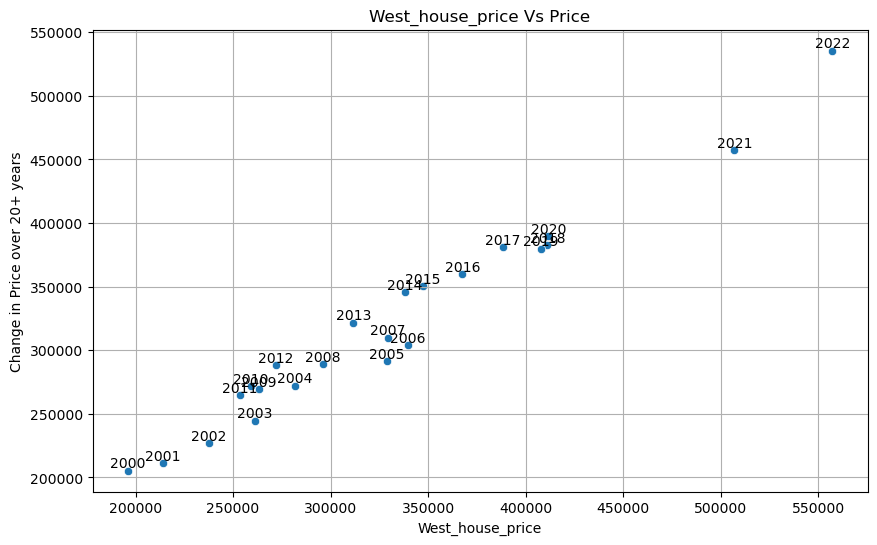

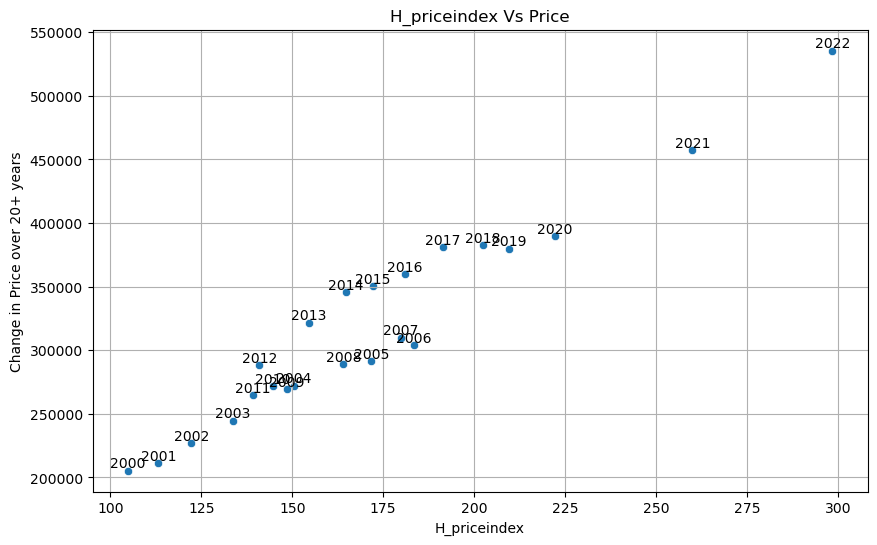

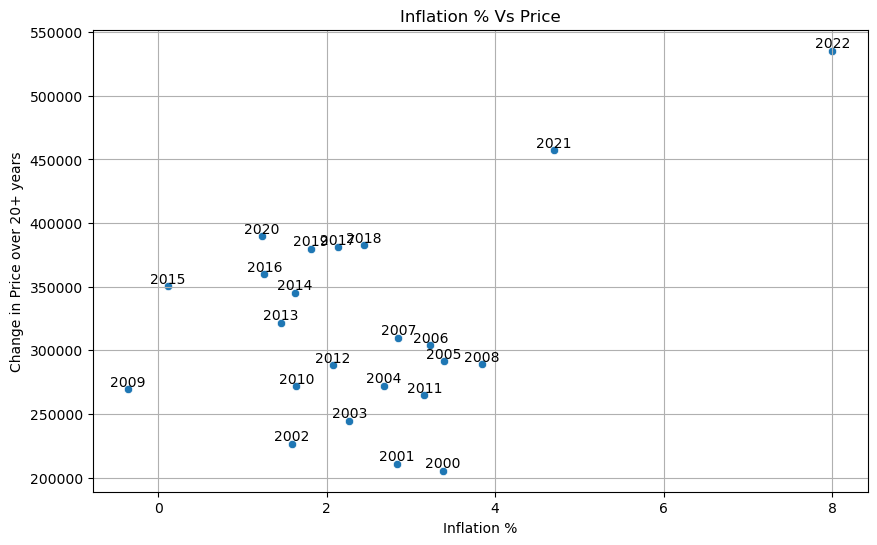

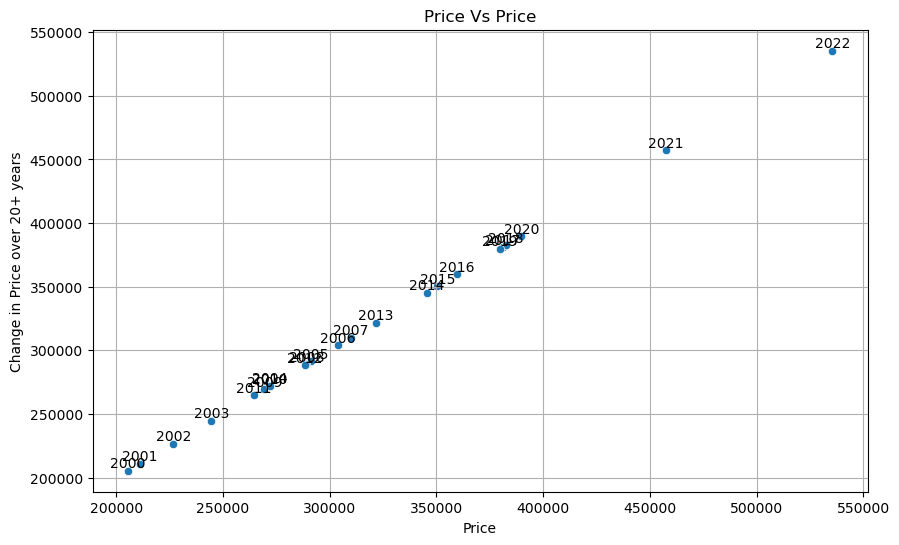

In [302]:
for factor in merge_data.columns:
    if factor == 'price':
        pass

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=factor, y='price', data=merge_data)
    
    for i, year in enumerate(merge_data['Year']):
        x_value = merge_data[factor][i]
        y_value = merge_data['price'][i]
        plt.text(x_value, y_value, str(year), ha='center', va='bottom')
    
    plt.xlabel(factor)
    plt.ylabel('Change in Price over 20+ years')
    plt.title(f"{factor} Vs Price")
    plt.grid(True)
    plt.show()

In [197]:
merge_data.columns = [column.capitalize() for column in merge_data.columns]

# Correlation of each factor to one amother corr near to 1 are highly corelated.

some of the columns are low in corelation but are essential for calculation.

In [198]:
corelation_data=merge_data.drop('Year',axis=1).corr()

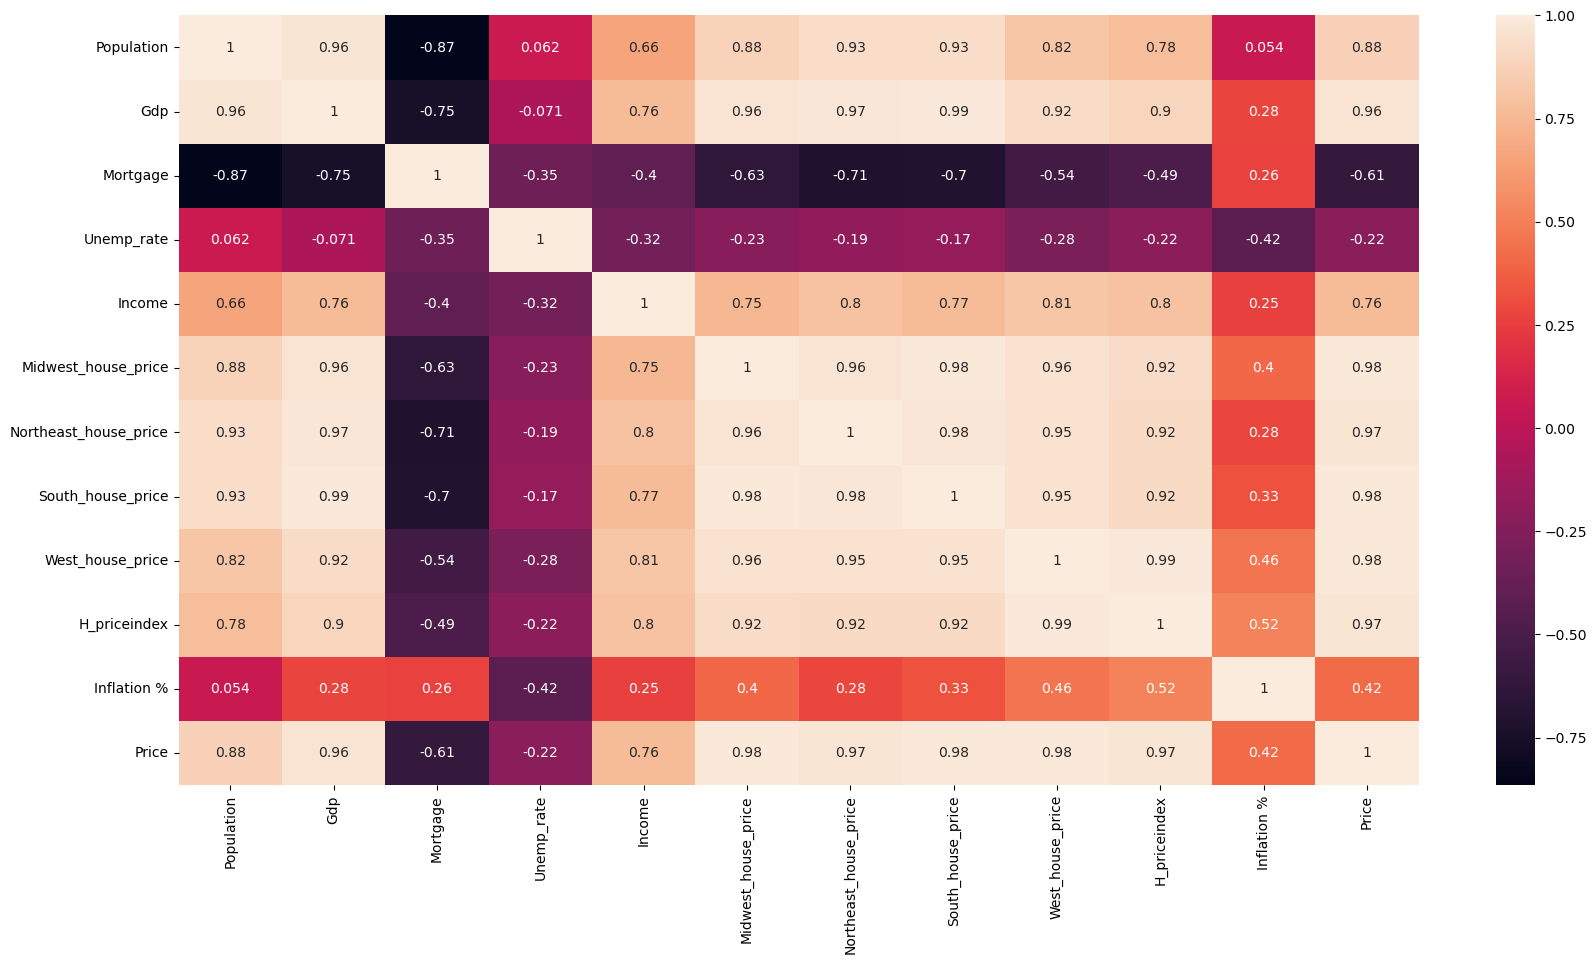

In [199]:
plt.figure(figsize=(20,10))
sns.heatmap(corelation_data,annot=True)
plt.show()

In [200]:
merge_data.to_csv('Factors_influence_house_price.csv',index=False)

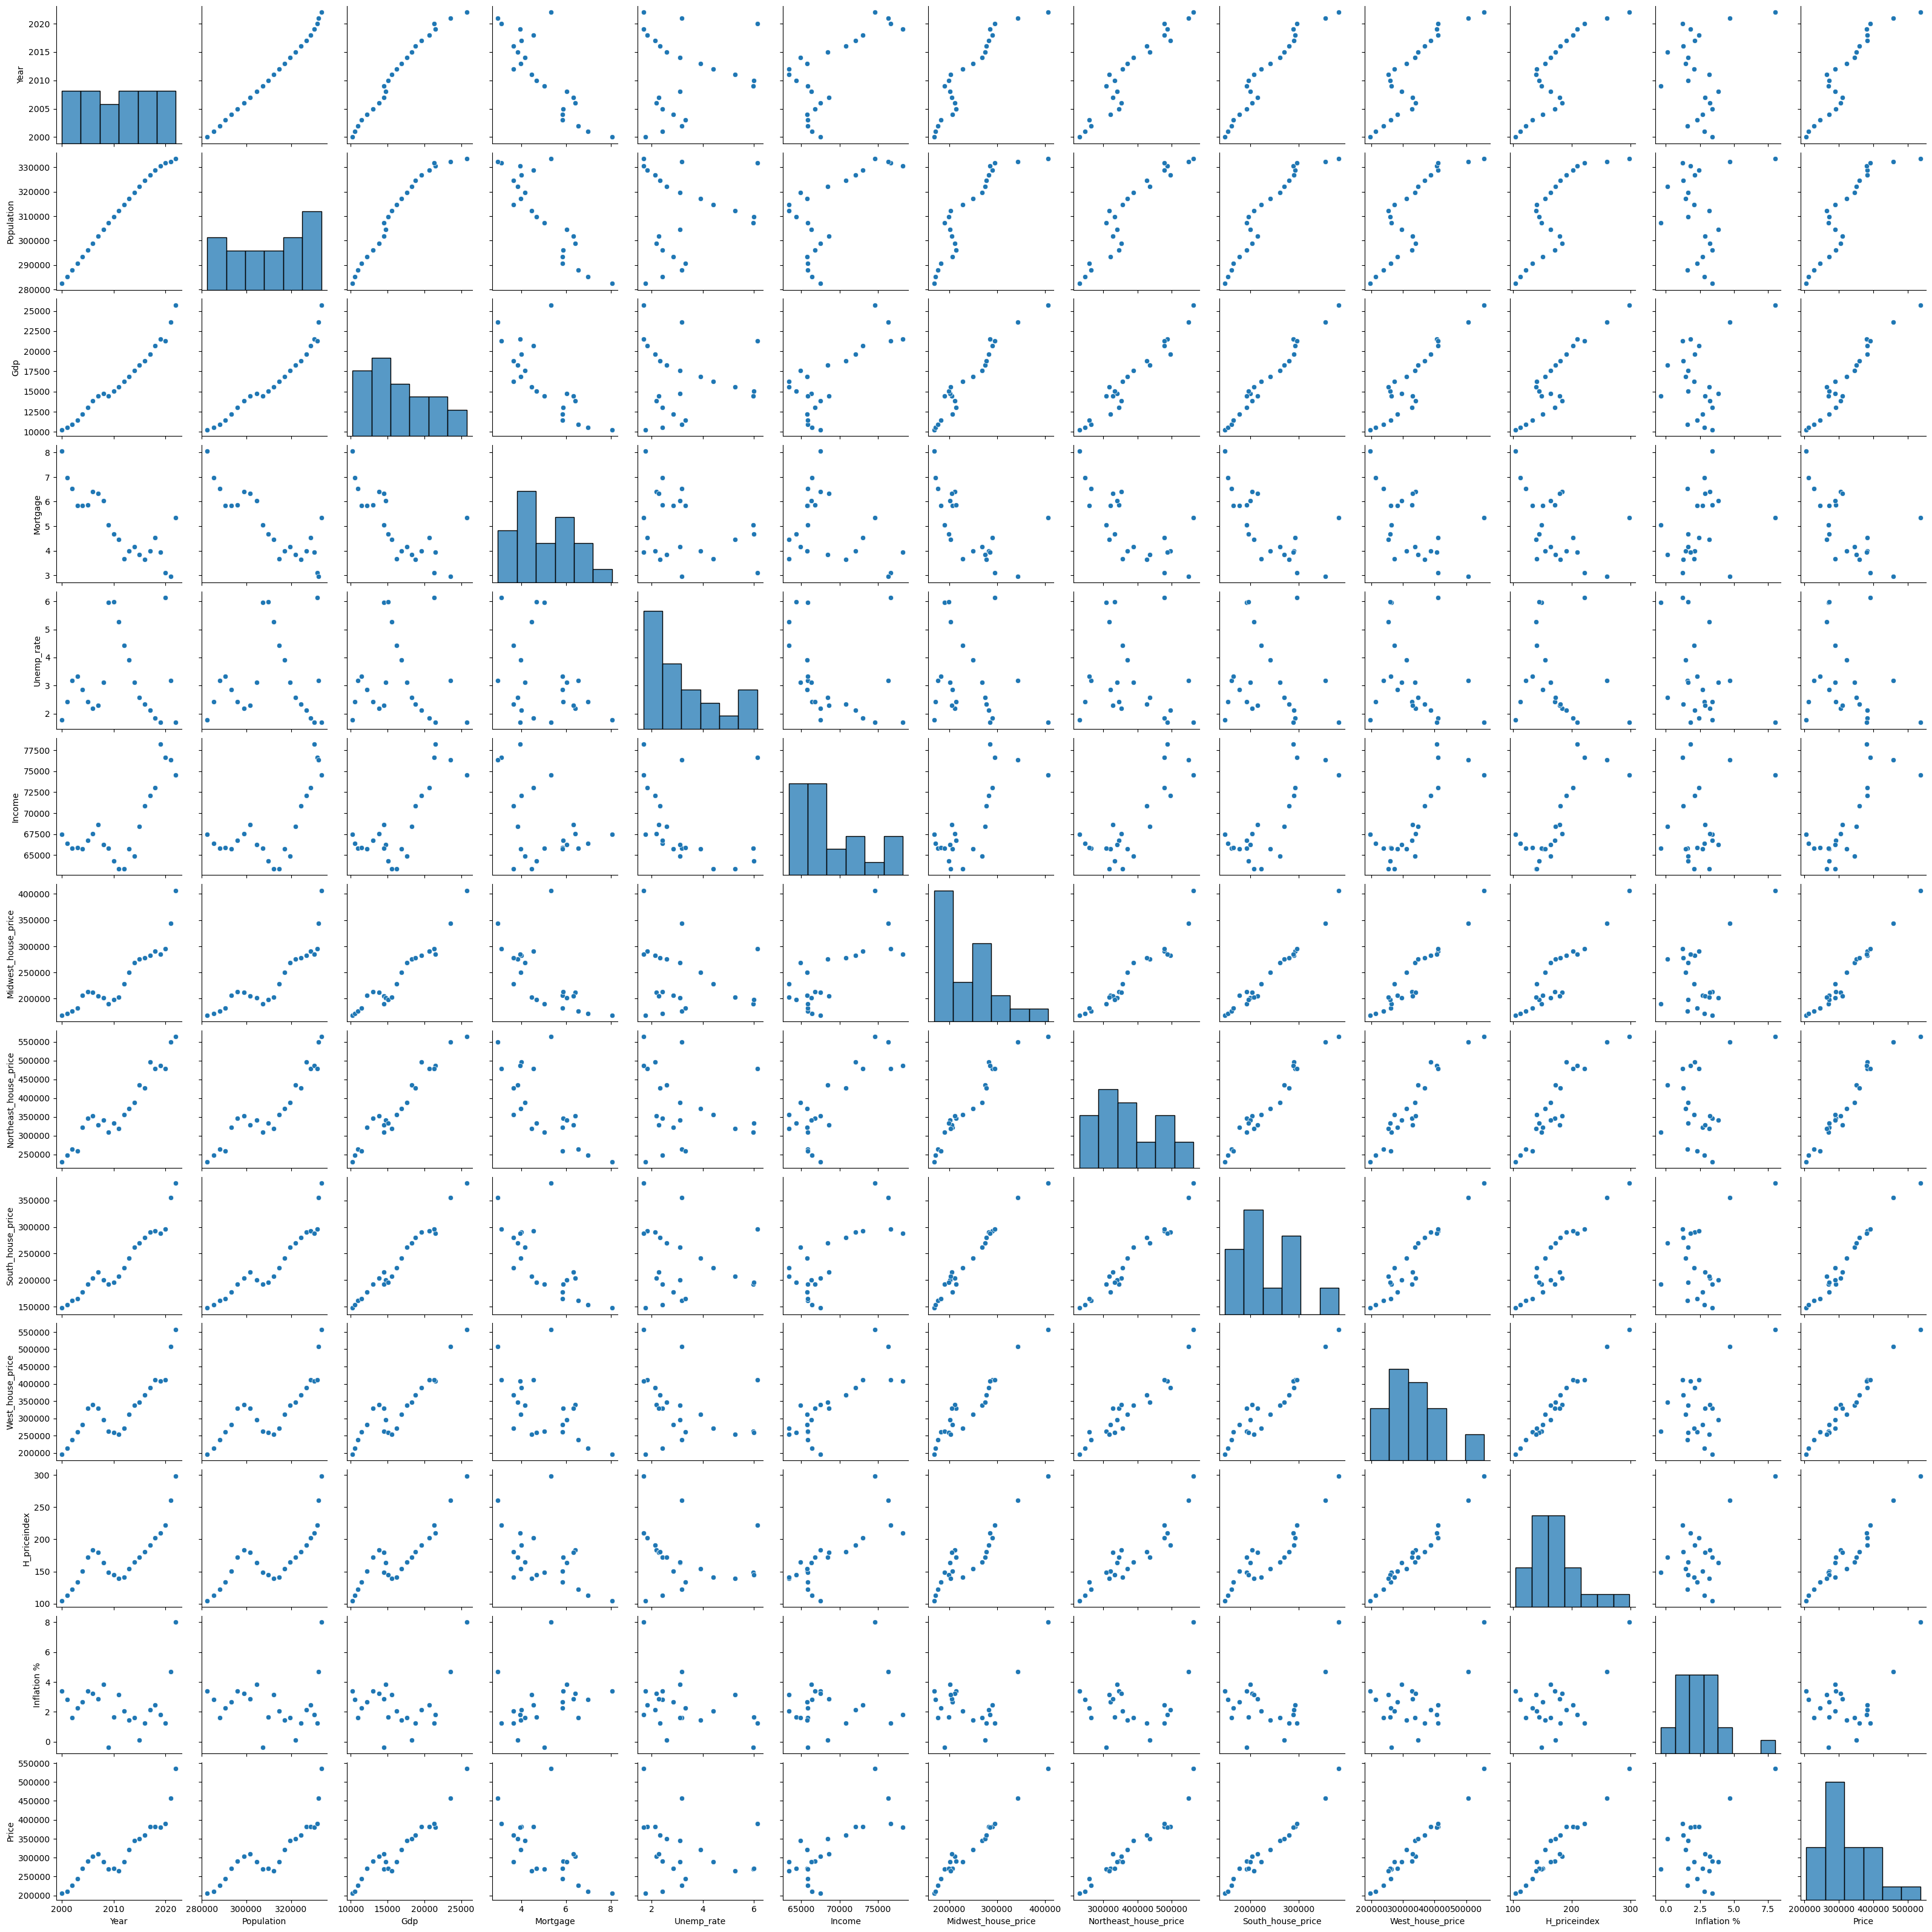

In [203]:
sns.pairplot(merge_data)

It is always a bes t practice to keep and work on data copy as it won change the raw data and helps retrieving the original data.

In [210]:
data=merge_data.copy()
data

,Year,Population,Gdp,Mortgage,Unemp_rate,Income,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price,H_priceindex,Inflation %,Price
0,2000,282398.42,10250.95,8.05,1.77,67470,168350.0,230750.0,147800.0,196025.0,104.77,3.38,205375.0
1,2001,285225.17,10581.93,6.97,2.42,66360,171425.0,247500.0,153925.0,214075.0,113.18,2.83,211050.0
2,2002,287954.58,10929.11,6.54,3.18,65820,176375.0,264450.0,162125.0,237650.0,122.28,1.59,226700.0
3,2003,290626.25,11456.45,5.83,3.32,65860,182075.0,259350.0,165800.0,261075.0,133.73,2.27,244550.0
4,2004,293262.33,12217.20,5.84,2.85,65760,206200.0,321850.0,178200.0,281525.0,150.44,2.68,272125.0
5,2005,295992.92,13039.20,5.87,2.43,66780,213700.0,345375.0,192650.0,329000.0,171.74,3.39,291275.0
6,2006,298817.67,13815.58,6.41,2.19,67520,211700.0,352775.0,203775.0,339625.0,183.45,3.23,303900.0
7,2007,301696.17,14474.23,6.34,2.29,68610,205750.0,328350.0,215250.0,329400.0,179.92,2.85,309800.0
8,2008,304543.08,14769.86,6.03,3.12,66280,201225.0,341075.0,200575.0,295925.0,164.06,3.84,289075.0
9,2009,307240.08,14478.07,5.04,5.96,65850,190300.0,308525.0,192950.0,263075.0,148.55,-0.36,269350.0


Splitting the data, essential for transforming and scaling.

Here the data is splited into features and target columns, usually known as independent and depent columns.

All the columns are independent except price because it is evaluated using all these features.

In [211]:
X=data.drop(labels='Price',axis=1)
y=data[['Price']]

In [212]:
# independent features
X

,Year,Population,Gdp,Mortgage,Unemp_rate,Income,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price,H_priceindex,Inflation %
0,2000,282398.42,10250.95,8.05,1.77,67470,168350.0,230750.0,147800.0,196025.0,104.77,3.38
1,2001,285225.17,10581.93,6.97,2.42,66360,171425.0,247500.0,153925.0,214075.0,113.18,2.83
2,2002,287954.58,10929.11,6.54,3.18,65820,176375.0,264450.0,162125.0,237650.0,122.28,1.59
3,2003,290626.25,11456.45,5.83,3.32,65860,182075.0,259350.0,165800.0,261075.0,133.73,2.27
4,2004,293262.33,12217.20,5.84,2.85,65760,206200.0,321850.0,178200.0,281525.0,150.44,2.68
5,2005,295992.92,13039.20,5.87,2.43,66780,213700.0,345375.0,192650.0,329000.0,171.74,3.39
6,2006,298817.67,13815.58,6.41,2.19,67520,211700.0,352775.0,203775.0,339625.0,183.45,3.23
7,2007,301696.17,14474.23,6.34,2.29,68610,205750.0,328350.0,215250.0,329400.0,179.92,2.85
8,2008,304543.08,14769.86,6.03,3.12,66280,201225.0,341075.0,200575.0,295925.0,164.06,3.84
9,2009,307240.08,14478.07,5.04,5.96,65850,190300.0,308525.0,192950.0,263075.0,148.55,-0.36


In [213]:
# dependent or target column
y

,Price
0,205375.0
1,211050.0
2,226700.0
3,244550.0
4,272125.0
5,291275.0
6,303900.0
7,309800.0
8,289075.0
9,269350.0


Sci-kit learnn is an essential libraries where is allows to preform preprocessing, train test split, model building and statistical analysis.

In [214]:
from sklearn.model_selection import train_test_split

Spliting of data in X_train, X_test, y_train, y_test.


In [215]:
# spliting the data and keeping the test size as 20 percent of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [216]:
X_train

,Year,Population,Gdp,Mortgage,Unemp_rate,Income,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price,H_priceindex,Inflation %
12,2012,314725.42,16253.97,3.66,4.42,63350,228100.0,356575.0,223175.0,271900.0,140.99,2.07
1,2001,285225.17,10581.93,6.97,2.42,66360,171425.0,247500.0,153925.0,214075.0,113.18,2.83
13,2013,317099.00,16880.68,3.98,3.92,65740,249825.0,371250.0,241375.0,311700.0,154.52,1.46
5,2005,295992.92,13039.20,5.87,2.43,66780,213700.0,345375.0,192650.0,329000.0,171.74,3.39
2,2002,287954.58,10929.11,6.54,3.18,65820,176375.0,264450.0,162125.0,237650.0,122.28,1.59
11,2011,312295.25,15599.73,4.45,5.27,63350,203400.0,318050.0,207800.0,253500.0,139.26,3.16
20,2020,331787.42,21322.95,3.11,6.13,76660,295450.0,477675.0,296275.0,411625.0,222.15,1.23
3,2003,290626.25,11456.45,5.83,3.32,65860,182075.0,259350.0,165800.0,261075.0,133.73,2.27
4,2004,293262.33,12217.20,5.84,2.85,65760,206200.0,321850.0,178200.0,281525.0,150.44,2.68
18,2018,328794.50,20656.52,4.54,1.84,73030,290300.0,478550.0,292200.0,411075.0,202.48,2.44


In [217]:
y_train

,Price
12,288225.0
1,211050.0
13,321650.0
5,291275.0
2,226700.0
11,264600.0
20,389800.0
3,244550.0
4,272125.0
18,382475.0


**StandardScaler** is a method used for standardization or z-score normalization of your data in machine learning and data analysis. It rescales your data to have a mean (average) of 0 and a standard deviation of 1, effectively transforming it into a standard normal distribution. 

MinMaxScaler

MaxAbsScaler

RobustScaler
 
These are different type od scaling method, applied each onr them but got the best results in Standard scaler

**It is also done because there shouldnt be any data leakage.**

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler=StandardScaler()

# Droping the Year column as it is not directly impacting the price.

In [220]:
X_train_scaled=scaler.fit_transform(X_train.drop(labels='Year',axis=1))
X_test_scaled=scaler.transform(X_test.drop(labels='Year',axis=1))


In [221]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.drop(labels='Year',axis=1).columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.drop(labels='Year',axis=1).columns)

In [222]:
X_train_scaled.round(3)

,Population,Gdp,Mortgage,Unemp_rate,Income,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price,H_priceindex,Inflation %
0,0.192,-0.089,-1.017,0.874,-1.143,-0.282,-0.270,-0.242,-0.736,-0.752,-0.391
1,-1.617,-1.386,1.687,-0.602,-0.510,-1.209,-1.446,-1.322,-1.378,-1.345,0.096
2,0.337,0.055,-0.756,0.505,-0.640,0.073,-0.112,0.042,-0.295,-0.464,-0.782
3,-0.957,-0.824,0.789,-0.595,-0.421,-0.517,-0.391,-0.718,-0.103,-0.096,0.455
4,-1.450,-1.307,1.336,-0.041,-0.623,-1.128,-1.263,-1.194,-1.116,-1.151,-0.698
5,0.043,-0.238,-0.372,1.502,-1.143,-0.686,-0.686,-0.482,-0.940,-0.789,0.308
6,1.238,1.071,-1.467,2.137,1.659,0.819,1.035,0.898,0.814,0.979,-0.929
7,-1.286,-1.186,0.756,0.062,-0.615,-1.035,-1.318,-1.137,-0.856,-0.907,-0.262
8,-1.124,-1.012,0.764,-0.285,-0.636,-0.640,-0.645,-0.944,-0.629,-0.551,0.000
9,1.054,0.918,-0.298,-1.030,0.895,0.735,1.044,0.835,0.808,0.560,-0.153


In [223]:
X_test_scaled.round(3)

,Population,Gdp,Mortgage,Unemp_rate,Income,Midwest_house_price,Northeast_house_price,South_house_price,West_house_price,H_priceindex,Inflation %
0,0.645,0.378,-0.862,-0.484,-0.078,0.489,0.575,0.490,0.101,-0.087,-1.640
1,-0.267,-0.495,0.110,2.011,-0.617,-0.900,-0.788,-0.714,-0.834,-0.591,-1.948
2,-1.790,-1.462,2.570,-1.082,-0.276,-1.259,-1.626,-1.418,-1.578,-1.525,0.449
3,-0.433,-0.428,0.919,-0.085,-0.526,-0.721,-0.437,-0.595,-0.470,-0.260,0.744
4,0.936,0.680,-0.748,-0.816,0.697,0.601,1.224,0.803,0.557,0.323,-0.352


**Graphical representation of factors and how they are import for predictin the house price.**

C:\Users\abhig\AppData\Local\Temp\ipykernel_32120\773417653.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train.drop(labels='Year',axis=1), y_train)


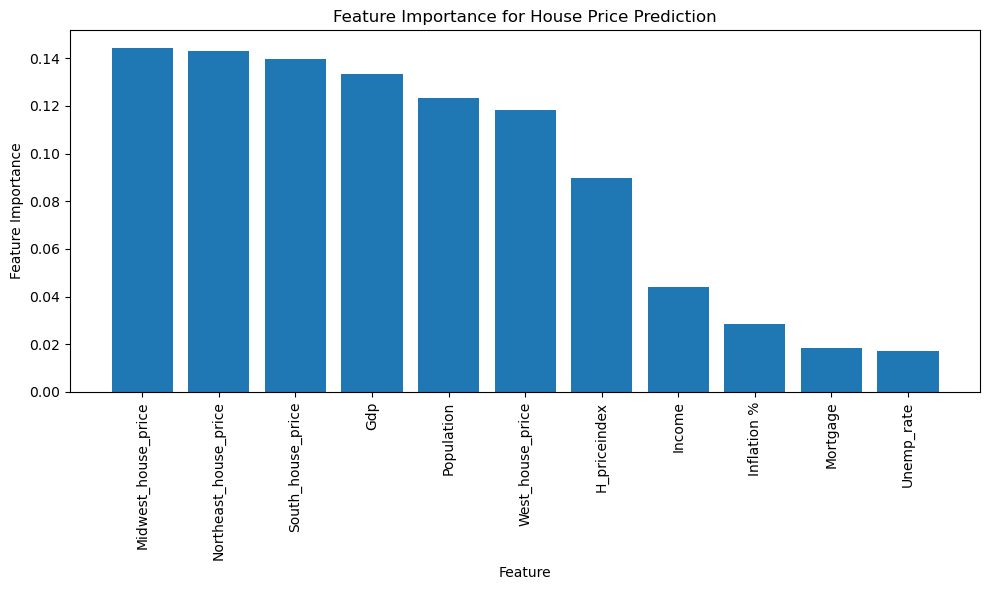

In [303]:

rf_model = RandomForestRegressor()
rf_model.fit(X_train.drop(labels='Year',axis=1), y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.drop(labels='Year',axis=1).columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for House Price Prediction')
plt.tight_layout()
plt.show()


**As you can observe there is no changes in the data points after and before scaling.** 

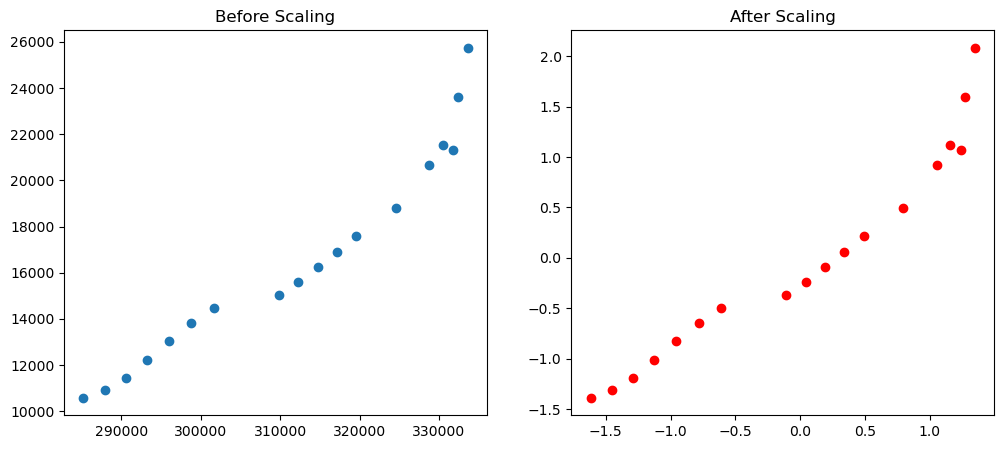

In [224]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Population'], X_train['Gdp'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Population'], X_train_scaled['Gdp'],color='red')
ax2.set_title("After Scaling")

plt.show()

# importing import libraries from model Training 

In [227]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# models used for evaluation

In [228]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'RandomForestRegressor': RandomForestRegressor()
}

In [229]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square,mse


In [230]:
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_scaled)

    #this is a validation(test) score
    mae, rmse, r2_square,mse=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE :",rmse)
    print("MAE :",mae)
    print("R2 score :",r2_square*100)
    print("MSE :",mse)

    r2_list.append(r2_square)
    
    print('='*50)
print('\n')

LinearRegression
Model Training Performance
RMSE : 12959.977298355227
MAE : 11516.794514785352
R2 score : 95.61206574923317
MSE : 167961011.57388285
Lasso
Model Training Performance
RMSE : 12706.40596656266
MAE : 11160.960623066
R2 score : 95.78209218723427
MSE : 161452752.58709913
Ridge
Model Training Performance
RMSE : 5300.312364077774
MAE : 4755.209017442947
R2 score : 99.26607013682977
MSE : 28093311.15679572
Elasticnet
Model Training Performance
RMSE : 11315.668181474859
MAE : 10234.343205303978
R2 score : 96.65487741535294
MSE : 128044346.39324255


c:\Users\abhig\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.952e+07, tolerance: 1.155e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhig\AppData\Local\Temp\ipykernel_32120\2719491906.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,y_train)


RandomForestRegressor
Model Training Performance
RMSE : 6821.8699654127095
MAE : 3772.0
R2 score : 98.78421017731017
MSE : 46537909.825




#  graph to show the predicted values vs actual values

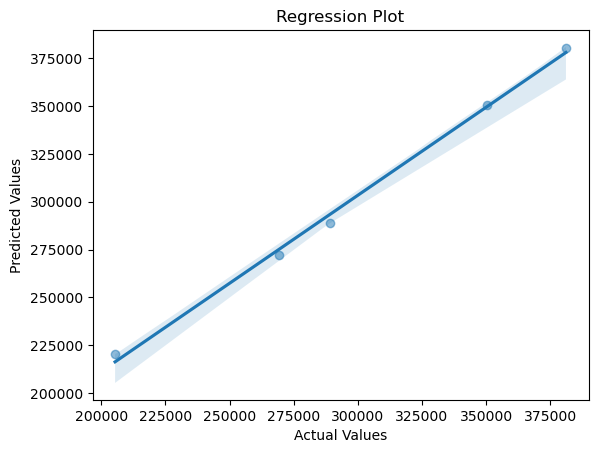

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have predicted values 'y_pred' and actual values 'y_actual'
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.show()


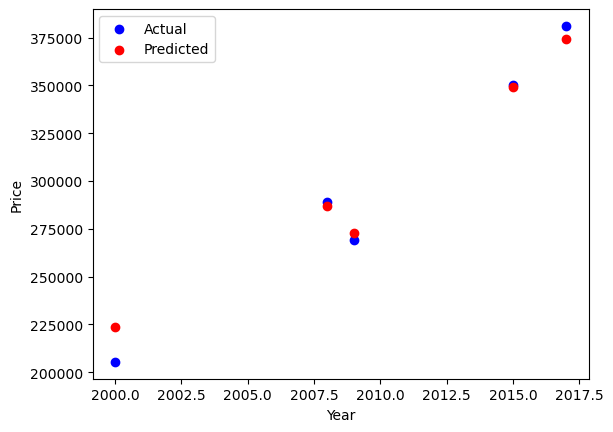

In [98]:
plt.scatter(X_test['Year'], y_test, color='b', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='r', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prediction of price with respect to current year.
inpuing all the independent values and prediction of price. 

In [234]:
# Assuming 'X_new' is a DataFrame with feature values for the year 2024
# The feature values should be in the same order and format as in your training data
current_year=int(input("Please enter the current year: "))
current_population=float(input("please enter the current year population : "))
current_GDP=float(input("please enter the current year GDP : "))
current_Mortgage=float(input("please enter the current year Mortgage % : "))
current_Unemp_rate=float(input("please enter the current year unemployement rate : "))
current_income=float(input("please enter the current year  income : "))
current_Midwest=float(input("please enter the current year  average mid west regiion price : "))
current_South_house_price=float(input("please enter the current year  average current_South_house_price : "))
current_Northeast_house_price=float(input("please enter the current year  average current northeast house_price : "))
current_West_house_price=float(input("please enter the current year  average West_house_price : "))
current_HPI=float(input("please enter the current year housing price index : "))
current_inflation=float(input("please enter the current yearInflation % : "))

# Example: create a new data point for 2024
X_new = pd.DataFrame({
    'Year': [current_year],
    'Population': [current_population],
    'Gdp': [current_GDP],
    'Mortgage': [current_Mortgage],
    'Unemp_rate': [current_Unemp_rate],
    'Income': [current_income],
    'Midwest_house_price': [current_Midwest],
    'Northeast_house_price': [current_Northeast_house_price],
    'South_house_price': [current_South_house_price],
    'West_house_price': [current_West_house_price],
    'H_priceindex': [current_HPI],
    'Inflation %' :[current_inflation]
})

# Initialize a dictionary to store predictions for each model
predictions = {}

# Iterate through the models
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions for the year 2024
    predicted_price = model.predict(X_new)
    predictions[model_name] = predicted_price

# Print the predicted prices for 2024 for each model
for model_name, predicted_price in predictions.items():
    print(f"{model_name}: Predicted Price for {current_year} ---> $ {predicted_price[0].round(2)}")


LinearRegression: Predicted Price for 2024 ---> $ [439360.47]
Lasso: Predicted Price for 2024 ---> $ 388052.24
Ridge: Predicted Price for 2024 ---> $ [348907.48]
Elasticnet: Predicted Price for 2024 ---> $ 290074.19
RandomForestRegressor: Predicted Price for 2024 ---> $ 341876.0


c:\Users\abhig\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e+07, tolerance: 1.155e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\abhig\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.884e+07, tolerance: 1.155e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\abhig\AppData\Local\Temp\ipykernel_32120\1823876017.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


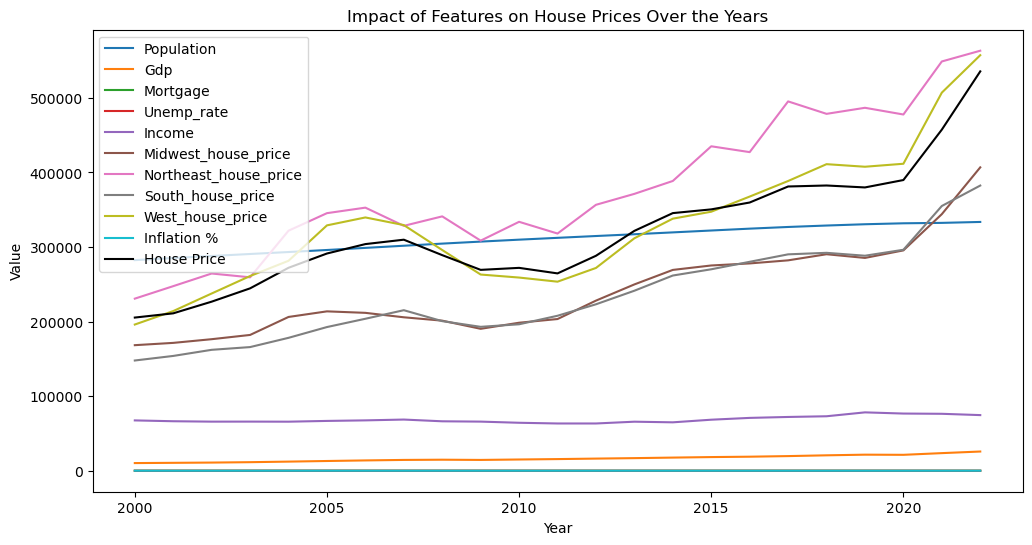

In [236]:

plt.figure(figsize=(12, 6))
feature_names=X_train.drop(labels=['Year','H_priceindex'],axis=1)
# Iterate through the feature names
for feature_name in feature_names:
    # Create a line plot for each feature
    sns.lineplot(x='Year', y=feature_name, data=merge_data, label=feature_name)
sns.lineplot(x='Year', y='Price', data=merge_data, label='House Price', color='k')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Impact of Features on House Prices Over the Years')
plt.legend()
plt.show()


**Representation of machine learning models and their performance**

c:\Users\abhig\anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
c:\Users\abhig\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


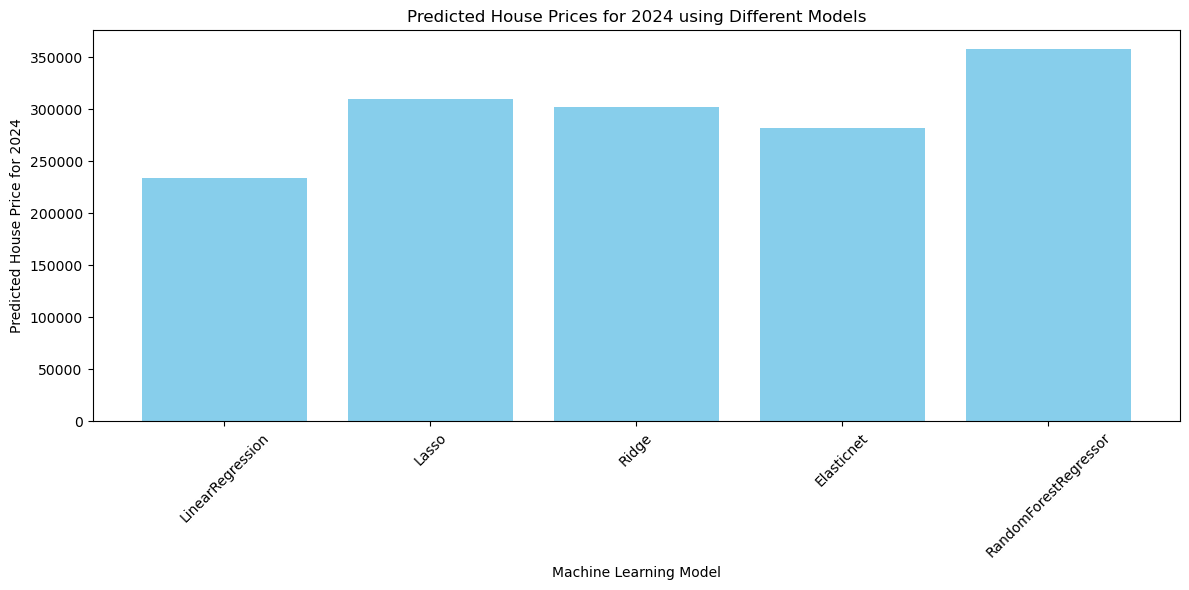

In [102]:


model_names = predictions.keys()
predicted_prices = [predicted_price[0] for predicted_price in predictions.values()]

plt.figure(figsize=(12, 6))
plt.bar(model_names, predicted_prices, color='skyblue')
plt.xlabel('Machine Learning Model')
plt.ylabel('Predicted House Price for 2024')
plt.title(f'Predicted House Prices for {current_year} using Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# With respect to above graph 
**models:Lasso Ridge and Elasticnet performed in similar range**

**RandomForestRegressor performed high compared to other models** 

**LinearRegression perfomed good but a bit low compared to other models**